# MNIST

A implementation to solve MNIST dataset

In [4]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [5]:
MNIST = fetch_openml('mnist_784', version=1)

In [6]:
MNIST.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [20]:
X = MNIST['data'].values
y = MNIST['target'].values

In [21]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
y = y.astype(np.int64)
y

array([5, 0, 4, ..., 4, 5, 6])

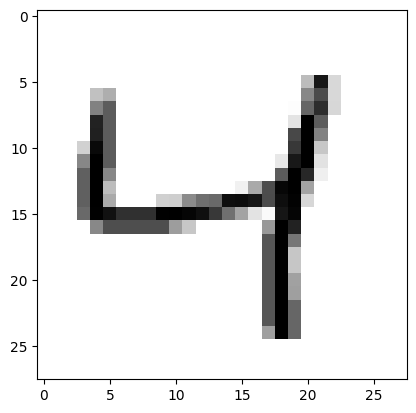

In [27]:
# Visual test to se data shape
i=2
plt.imshow(X[i].reshape(28, 28), cmap='binary')
plt.show()

### Multiclass Classificator

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [65]:
print(pd.Series(y_train).value_counts())

1    5423
7    5147
3    4980
2    4914
9    4899
0    4864
6    4830
4    4750
8    4745
5    4448
Name: count, dtype: int64


In [73]:
from sklearn.linear_model import SGDClassifier


sgd_cls = SGDClassifier()
sgd_cls.fit(X=X_train, y=y_train)

SGDClassifier()

2
[2]


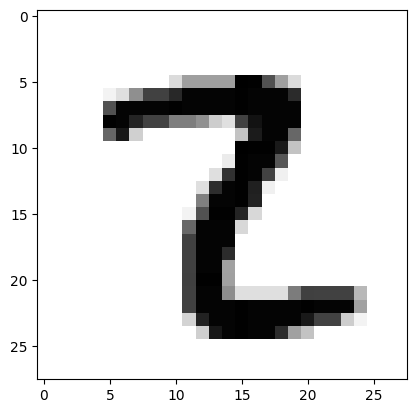

In [74]:
i = 0
plt.imshow(X_test[i].reshape(28, 28), cmap='binary')

print(y_test[i])
print(sgd_cls.predict([X_test[i]]))
plt.show()

In [75]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_cls, X_train, y_train, cv=3)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
conf_matrix = confusion_matrix(y_train_pred, sgd_cls.predict(X_train))
print(classification_report(y_train_pred, sgd_cls.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4809
           1       0.99      0.92      0.95      5547
           2       0.85      0.90      0.88      4909
           3       0.88      0.86      0.87      5283
           4       0.95      0.82      0.88      4756
           5       0.76      0.86      0.81      3914
           6       0.76      0.99      0.86      4889
           7       0.94      0.88      0.91      5523
           8       0.88      0.67      0.76      4604
           9       0.82      0.87      0.85      4766

    accuracy                           0.88     49000
   macro avg       0.88      0.87      0.87     49000
weighted avg       0.88      0.88      0.88     49000



<Axes: >

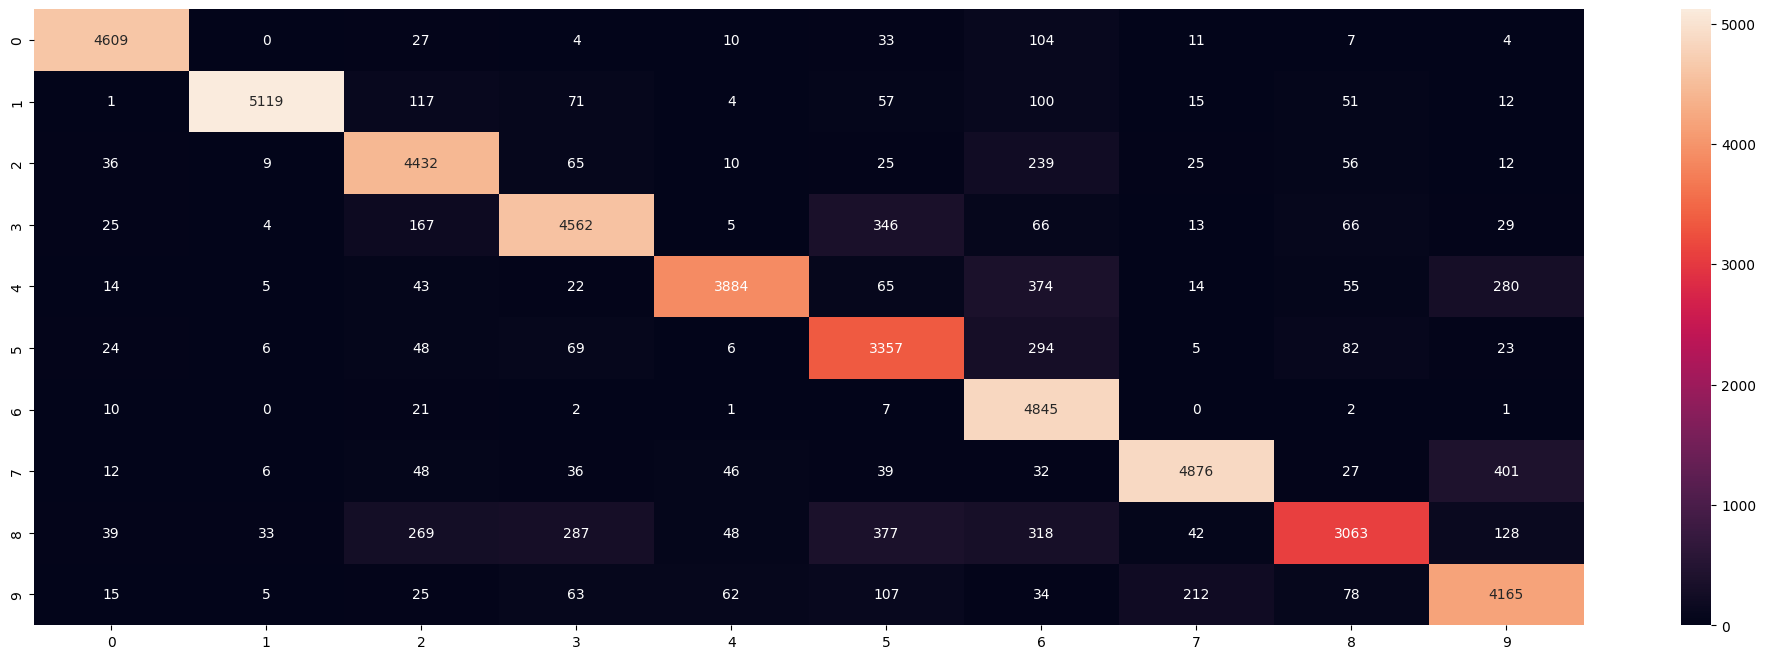

In [ ]:
fig, ax = plt.subplots(figsize= (25, 8))

seaborn.heatmap(conf_matrix, annot=True, fmt=".0f")

<Axes: >

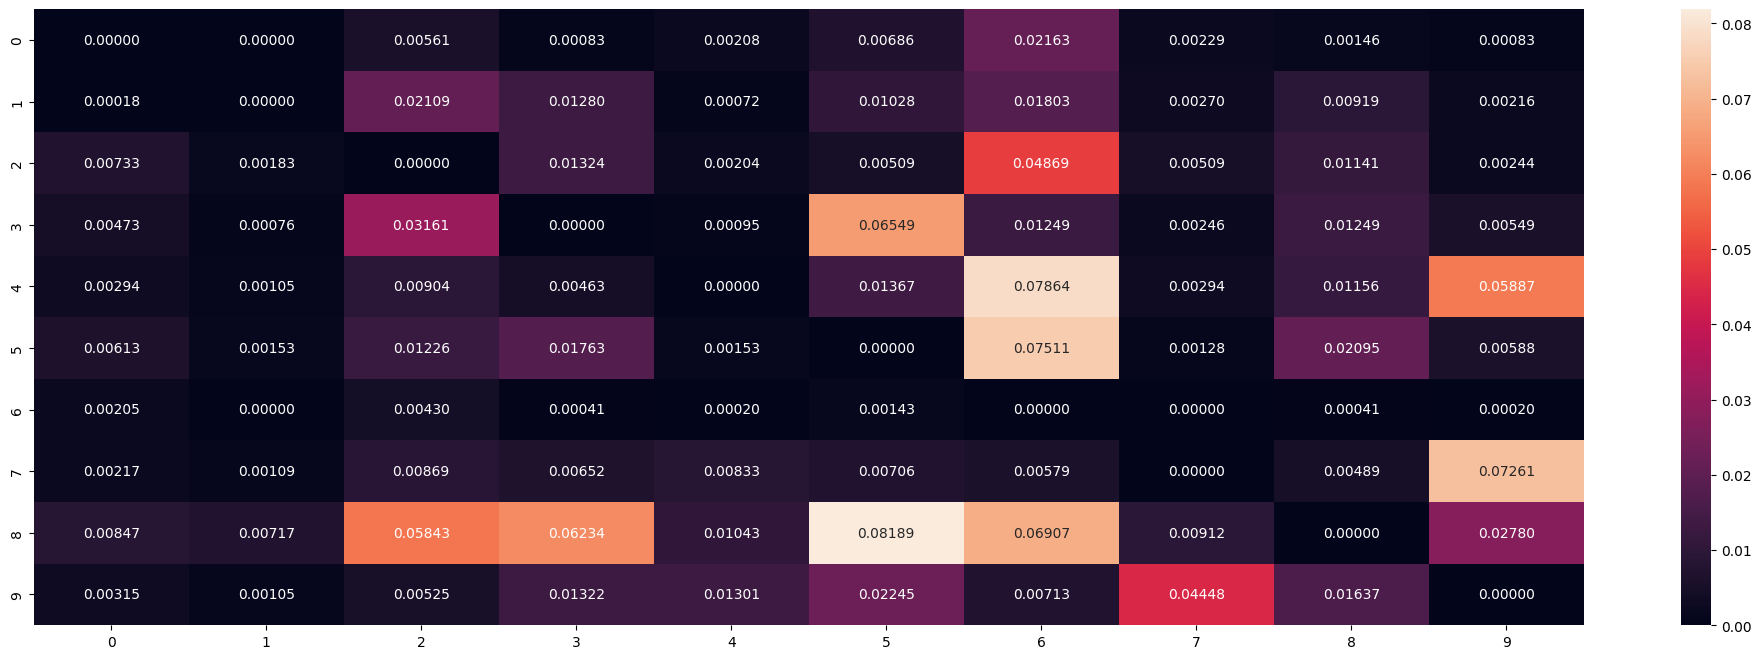

In [84]:
rows_sum  = conf_matrix.sum(axis=1, keepdims= True)

norm_conf_matrix = conf_matrix/rows_sum
np.fill_diagonal(norm_conf_matrix, 0)

fig, ax = plt.subplots(figsize= (25, 8))

seaborn.heatmap(norm_conf_matrix, annot=True, fmt=".5f")